In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [18]:
import seaborn as sns

In [3]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.8.0.post0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.
autogluon-core 0.1.0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.


In [45]:
from fastbook import *
# from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

# pd.options.display.max_rows = 20
# pd.options.display.max_columns = 10

In [7]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv", low_memory=False)
#train_data.columns
train_data['train_test'] = 1
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv", low_memory=False)
test_data['train_test'] = 0
test_data['Survived'] = np.NaN
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [11]:
all_data = pd.concat([train_data,test_data])
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [13]:
# quick way to separate numeric columns
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [14]:
# Look at numeric and categorical values separately
df_num = train_data[['Age','SibSp','Parch','Fare']]
df_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

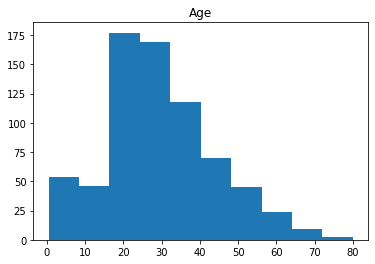

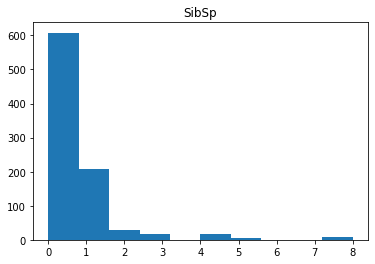

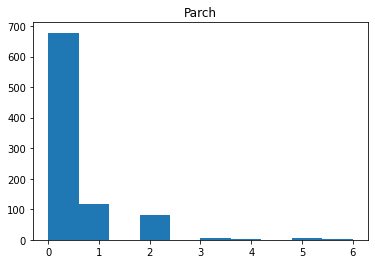

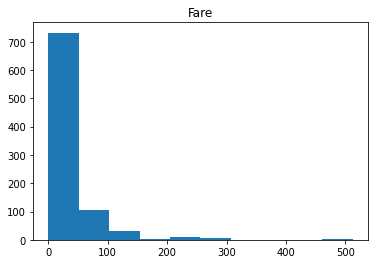

In [16]:
# Distributions for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Perhaps we should take the non-normal distributions and consider normalizing them?

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

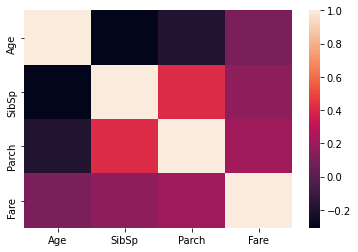

In [19]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [21]:
# compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(train_data, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


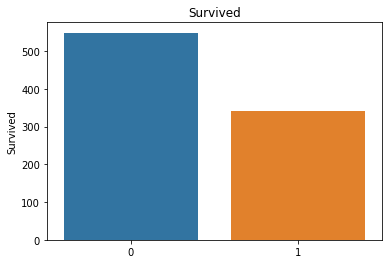

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


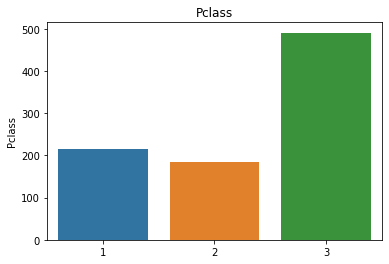

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


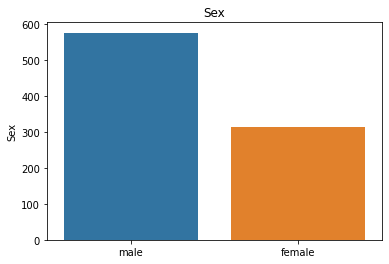

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


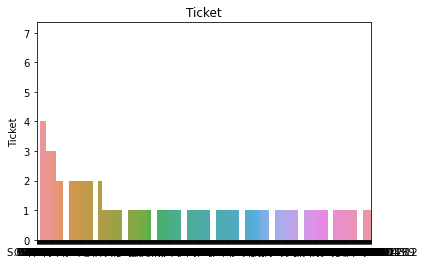

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


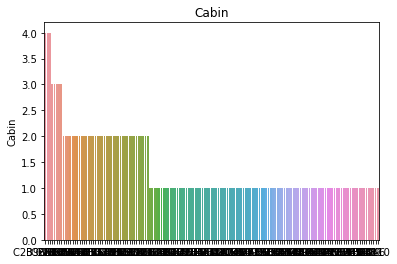

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


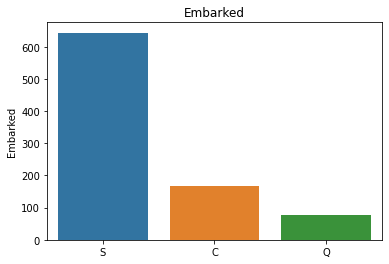

In [24]:
# Distributions for all categorical variables
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering! 

In [25]:
# Comparing survival and each of these categorical variables
print(pd.pivot_table(train_data, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Engineering

1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

2) Tickets - Do different ticket types impact survival rates?

3) Does a person's title relate to survival rates? 

In [27]:
df_cat.Cabin
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this
# letters
# multiple letters
train_data['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [28]:
pd.pivot_table(train_data, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [29]:
# create categories based on the cabin letter (n stands for null)
# in this case we will treat null values like it's own category

train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [34]:
# compare survival rate by cabin
print(train_data.cabin_adv.value_counts())
pd.pivot_table(train_data, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [35]:
# understand ticket values beter
# numeric vs non numeric
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [38]:
train_data['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [39]:
# let us view all rows in dataframe through scrolling. This is for convenience
pd.set_option('max_rows', None)
train_data['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
wep            3
sopp           3
pp             3
sotono2        2
scah           2
swpp           2
ppp            2
as             1
casoton        1
sc             1
sop            1
scow           1
scahbasle      1
fa             1
sca4           1
sp             1
fc             1
Name: ticket_letters, dtype: int64

In [40]:
# difference in numeric vs non-numeric tickets in survival rate
pd.pivot_table(train_data, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [46]:
# survival rate across different ticket types
pd.pivot_table(train_data, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,...,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,...,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,...,NaN,8.0,2.0,1.0,1.0


In [49]:
# feature engineering on person's title
train_data.Name.head(50)
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
# mr., ms., master., etc. 

In [50]:
train_data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Capt              1
Don               1
the Countess      1
Ms                1
Mme               1
Jonkheer          1
Sir               1
Name: name_title, dtype: int64

### Data Preprocessing for Model

1)Drop null values from Embarked (only 2)

2)Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passenger ID so that we could have a reasonable number of features for our models to deal with)
*Variables:'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title'*

3)Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our training and test data have the same columns. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommended outside of a competition (use onehot encoder).

4)Impute data with mean for fare and age (Should also experiment with median)

5)Normalized fare using logarithm to give more semblance of a normal distribution

6)Scaled data 0-1 with standard scaler

(889,)

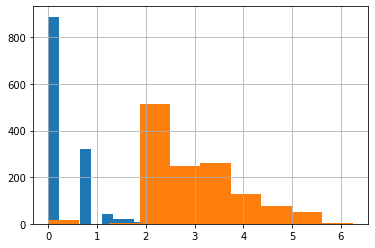

In [51]:
# create all categorical variables that we did above for both training and test sets
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# impute nulls for continuous data
all_data.Age = all_data.Age.fillna(train_data.Age.mean())
all_data.Fare = all_data.Fare.fillna(train_data.Fare.mean())

# drop null 'embarked' rows. Only 2 instances of this in training and 0 in test
all_data.dropna(subset=['Embarked'], inplace=True)

# tried log norm of SibSp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

# created dummy variables from categores (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

# Split to train ttest again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [52]:
# Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'], axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test==1].Survived

### Model Building (Baseline Validation Performance)

Before going futher, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set baseline, we can see how much tuning improves each of the models. Just because a model has a high baseline on this validation set doesn't mean that it will actually do better on the eventual test set. 
* Naive Bays (72.6%)
* Logistic Regeression (82.1%)
* Decision Tree (77.6%)
* K Nearest Neighbor (80.5%)
* Random Forest (80.6%)
* **Support Vector Classifier (83.2%)**
* Xtreme Gradient Boosting (81.8%)
* Soft Voting Classifier - All models (82.8%)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
# I usually use Naive Bays as a baseline for my classification tasks
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [56]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626
